(1797, 64)
(1797,)
(1797, 8, 8)


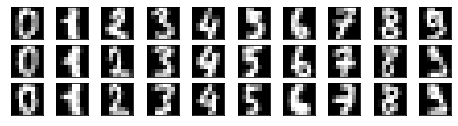

In [270]:
from sklearn import datasets
from sklearn import decomposition
import matplotlib.pyplot as plt
import numpy as np
import seaborn
from mpl_toolkits.mplot3d import Axes3D

mnist = datasets.load_digits()

X = mnist.data
y = mnist.target

print(mnist.data.shape)
print(mnist.target.shape)
print(mnist.images.shape )

X_vis = X.reshape(mnist.data.shape[0],8,8)

fig, axes = plt.subplots(3, 10, figsize=(8,2), subplot_kw={"xticks":[], "yticks":[]})
for i, ax in enumerate(axes.flat):
    ax.imshow(X_vis[i, :, :], cmap='gray')

Text(0.5, 0, 'number of components')

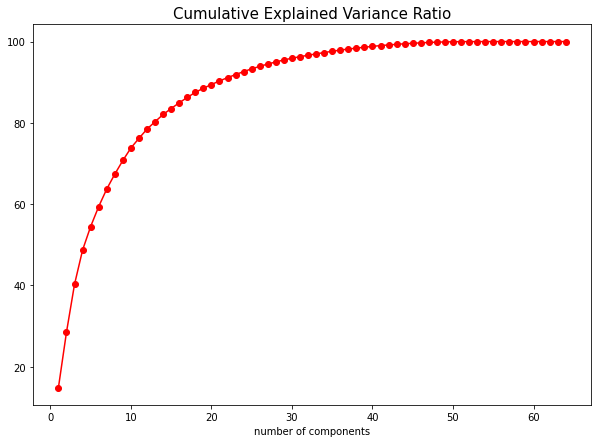

In [271]:
pca = PCA(n_components=None)
from sklearn import preprocessing
 

 
pca.fit(X)

# 获取解释方差比率

evr = pca.explained_variance_ratio_ * 100

# 查看累计解释方差比率与主成分个数的关系

fig, ax = plt.subplots(figsize=(10, 7))

ax.plot(np.arange(1, len(evr) + 1), np.cumsum(evr), "-ro")

ax.set_title("Cumulative Explained Variance Ratio", fontsize=15)

ax.set_xlabel("number of components")
 

In [276]:
target = 0.95 # 保留原始数据集90%的变异

res = PCA(n_components=target).fit_transform(X)

print("original shape: ", X.shape)

print("transformed shape: ", res.shape)
 

original shape:  (1797, 64)
transformed shape:  (1797, 29)


In [280]:
 
from sklearn.decomposition import PCA
 
pca = PCA(n_components=31)
X_new = pca.fit_transform(X)#"""查看PCA的一些属性"""
 
print("降维后的每个特征向量上所带的信息量大小\n",pca.explained_variance_) # 属性可以查看降维后的每个特征向量上所带的信息量大小（可解释性方差的大小）
print(  )
print("每个新特征的信息量占原始数据总信息量的百分比\n",pca.explained_variance_ratio_) # 查看降维后的每个新特征的信息量占原始数据总信息量的百分比
print(  )
print("降维后信息保留量\n",pca.explained_variance_ratio_.sum()) # 降维后信息保留量

降维后的每个特征向量上所带的信息量大小
 [179.0069301  163.71774688 141.78843909 101.1003752   69.51316559
  59.10852489  51.88453911  44.01510667  40.31099529  37.0117984
  28.51904118  27.3211698   21.90148812  21.32435654  17.63672215
  16.9468638   15.85138989  15.00446     12.23447253  10.88685883
  10.6935649    9.58259675   9.22639888   8.69035846   8.3656016
   7.16577773   6.91966134   6.1928679    5.88483383   5.15553363
   4.4910543 ]

每个新特征的信息量占原始数据总信息量的百分比
 [0.14890594 0.13618771 0.11794594 0.08409979 0.05782415 0.0491691
 0.04315987 0.03661373 0.03353248 0.03078806 0.02372341 0.02272697
 0.01821863 0.01773855 0.01467101 0.01409716 0.01318589 0.01248138
 0.01017718 0.00905617 0.00889538 0.00797123 0.00767493 0.00722903
 0.00695888 0.00596081 0.00575608 0.0051515  0.00489527 0.0042886
 0.00373586]

降维后信息保留量
 0.9628206930580018


(31, 64)


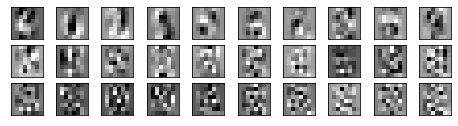

In [279]:
pca = PCA(31).fit(mnist.data) # 降到31维
V = pca.components_ # 基
print(V.shape) #  每一行是一个基，用这个乘上我们样本X，就会得到降维后的结果矩阵
# 下面可视化一下V
fig, axes = plt.subplots(3,10, figsize=(8,2), subplot_kw={"xticks":[],
"yticks":[]})
for i, ax in enumerate(axes.flat):
   ax.imshow(V[i,:].reshape(8, 8), cmap='gray')

(1797, 64)


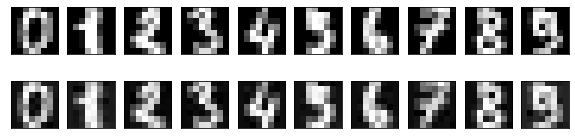

In [253]:
# 我们先得到降维后的数据
X_dr = pca.transform(X) # 这个是1358,150的数据
#然后我们调用接口逆转
X_inverse = pca.inverse_transform(X_dr)
print(X_inverse.shape) # （1348， 2914）
fig, ax = plt.subplots(2, 10, figsize=(10,2.5), subplot_kw={"xticks":[],"yticks":[]})
for i in range(10):
  ax[0,i].imshow(mnist.images[i,:, :], cmap='binary_r')
  ax[1,i].imshow(X_inverse[i].reshape(8, 8), cmap="binary_r")

(1797, 65)


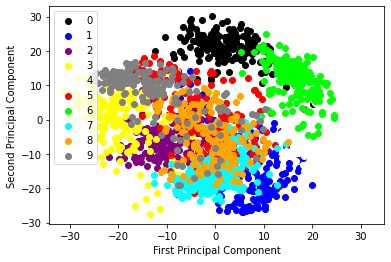

In [55]:

import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
digits_test = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/optdigits/optdigits.tes', header=None)
print(digits_test.shape)    #(1797, 65)

X_digits = digits_test[np.arange(64)]         #得到64位特征值
y_digits = digits_test[64]                    #得到对应的标签

#3.2 PCA降维：降到2维
estimator = PCA(n_components=2)
X_pca=estimator.fit_transform(X_digits)

#3.3 显示这10类手写体数字图片经PCA压缩后的2维空间分布
def plot_pca_scatter():
    colors = ['black', 'blue', 'purple', 'yellow', 'white', 'red', 'lime', 'cyan', 'orange', 'gray']
    for i in range(len(colors)):
        px = X_pca[:, 0][y_digits.values  == i]
        py = X_pca[:, 1][y_digits.values  == i]
        plt.scatter(px, py, c=colors[i])
    plt.legend(np.arange(0, 10).astype(str))
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')
    plt.show()
plot_pca_scatter()

 

In [1]:
import numpy as np
import pandas as pd
data = pd.read_csv('train_Loan_Prediction.csv')

data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [13]:
 data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [14]:
data.isnull().sum() 

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [15]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [29]:
#缺失值
data1=data
 

In [31]:
data1.isnull().sum()
 
 

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

C:\Users\86135\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


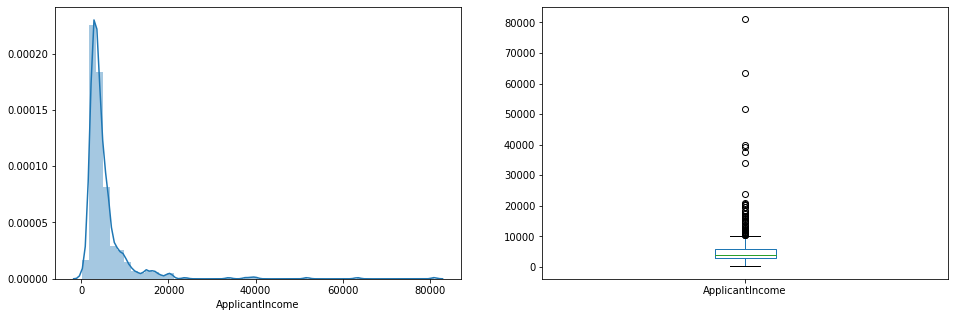

In [32]:
# 判断是否符合 正态分布  寻找异常值
from matplotlib import pyplot as plt
import seaborn as sns
plt.figure()
plt.subplot(121)
sns.distplot( data1['ApplicantIncome']);
plt.subplot(122)
data1['ApplicantIncome'].plot.box(figsize=(16,5))
plt.show()



NameError: name 'Text' is not defined

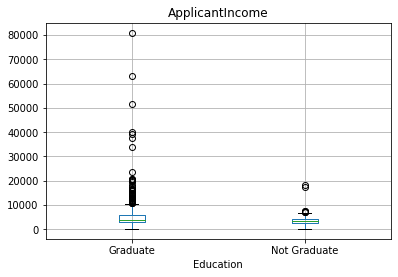

In [34]:
data1.boxplot(column='ApplicantIncome', by = 'Education')
plt.suptitle("")
Text(0.5,0.98,'')

C:\Users\86135\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


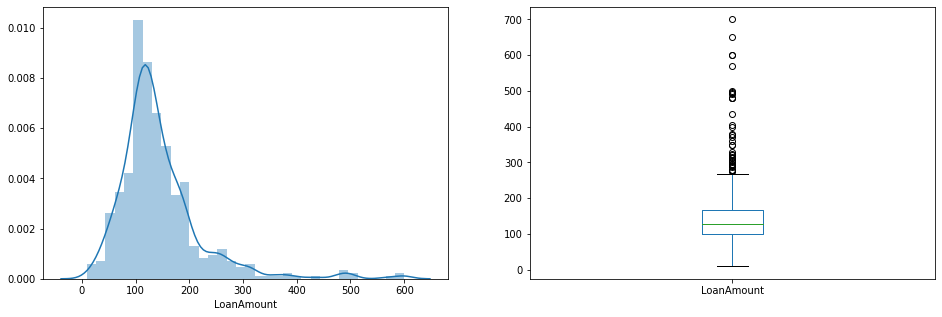

In [38]:
plt.figure(1)
plt.subplot(121)
df= data1.dropna()
sns.distplot(df['LoanAmount']);

plt.subplot(122)
data1['LoanAmount'].plot.box(figsize=(16,5))

plt.show()
 

In [43]:
#填充缺失值
data1['Gender'].fillna(data1['Gender'].value_counts().idxmax(), inplace=True)
data1['Married'].fillna(data1['Married'].value_counts().idxmax(), inplace=True)
data1['Dependents'].fillna(data1['Dependents'].value_counts().idxmax(), inplace=True)
data1['Self_Employed'].fillna(data1['Self_Employed'].value_counts().idxmax(), inplace=True)
data1["LoanAmount"].fillna(data1["LoanAmount"].mean(skipna=True), inplace=True)
data1['Loan_Amount_Term'].fillna(data1['Loan_Amount_Term'].value_counts().idxmax(), inplace=True)
data1['Credit_History'].fillna(data1['Credit_History'].value_counts().idxmax(), inplace=True)
 


<bound method NDFrame.head of       Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849            

<AxesSubplot:>

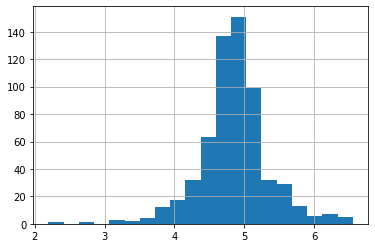

In [45]:
#异常值处理
data1['LoanAmount_log'] = np.log(data1['LoanAmount'])
data1['LoanAmount_log'].hist(bins=20)

<AxesSubplot:>

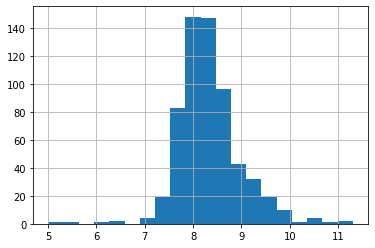

In [46]:
data1['ApplicantIncomeLog'] = np.log(data1['ApplicantIncome']) 
data1['ApplicantIncomeLog'].hist(bins=20)


In [47]:
from collections import Counter
np.seterr(divide='ignore', invalid='ignore')
def chimerge(data, attr, label, max_intervals):
    distinct_vals = sorted(set(data[attr])) # Sort the distinct values
    labels = sorted(set(data[label])) # Get all possible labels
    empty_count = {l: 0 for l in labels} # A helper function for padding the Counter()
    intervals = [[distinct_vals[i], distinct_vals[i]] for i in range(len(distinct_vals))] # Initialize the intervals for each attribute
    
    while len(intervals) > max_intervals: # While loop
        chi = []
        for i in range(len(intervals)-1):
            # Calculate the Chi2 value
            obs0 = data[data[attr].between(intervals[i][0], intervals[i][1])]
            obs1 = data[data[attr].between(intervals[i+1][0], intervals[i+1][1])]
            total = len(obs0) + len(obs1)
            count_0 = np.array([v for i, v in {**empty_count, **Counter(obs0[label])}.items()])
            count_1 = np.array([v for i, v in {**empty_count, **Counter(obs1[label])}.items()])
            count_total = count_0 + count_1
            expected_0 = count_total*sum(count_0)/total
            expected_1 = count_total*sum(count_1)/total
            chi_ = (count_0 - expected_0)**2/expected_0 + (count_1 - expected_1)**2/expected_1
            chi_ = np.nan_to_num(chi_) # Deal with the zero counts
            chi.append(sum(chi_)) # Finally do the summation for Chi2
        min_chi = min(chi) # Find the minimal Chi2 for current iteration
        for i, v in enumerate(chi):
            if v == min_chi:
                min_chi_index = i # Find the index of the interval to be merged
                break
        new_intervals = [] # Prepare for the merged new data array
        skip = False
        done = False
        for i in range(len(intervals)):
            if skip:
                skip = False
                continue
            if i == min_chi_index and not done: # Merge the intervals
                t = intervals[i] + intervals[i+1]
                new_intervals.append([min(t), max(t)])
                skip = True
                done = True
            else:
                new_intervals.append(intervals[i])
        intervals = new_intervals
    for i in intervals:
        print('[', i[0], ',', i[1], ']', sep='')

In [48]:
for attr in ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']:
    print('Interval for', attr)
    chimerge(data=data1, attr=attr, label='Loan_Status', max_intervals=5) 

Interval for ApplicantIncome
[150,3417]
[3418,3430]
[3450,3500]
[3510,3600]
[3601,81000]
Interval for CoapplicantIncome
[0.0,1875.0]
[1881.0,1917.0]
[1929.0,2531.0]
[2541.0,2583.0]
[2598.0,41667.0]
Interval for LoanAmount
[9.0,60.0]
[61.0,83.0]
[84.0,106.0]
[107.0,131.0]
[132.0,700.0]
